In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data.shape

(1797, 64)

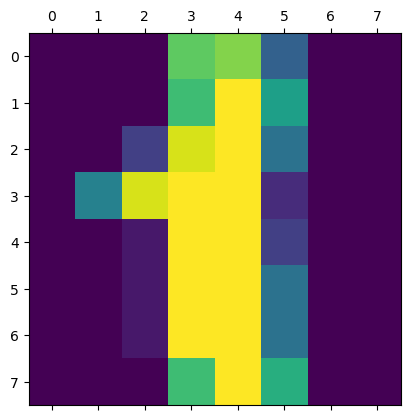

In [8]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])#cant plot all dimentions..so ploting one
plt.show()

In [9]:
digits.target[1]

1

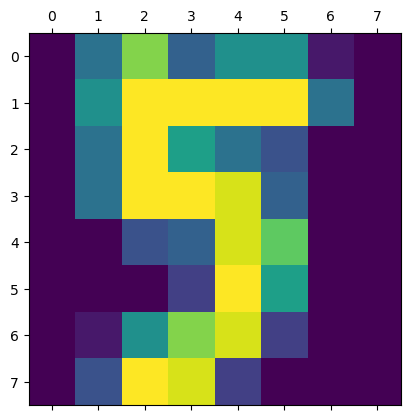

In [11]:
plt.matshow(digits.images[33])#cant plot all dimentions..so ploting one
plt.show()

In [12]:
digits.target[33]

5

In [16]:
#reducing the number of dimention,,,,(no of dimentions before reducing 64)
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
new_digits =pca.fit_transform(digits.data)

In [17]:
new_digits.shape #after

(1797, 2)

In [18]:
digits.data.shape #before

(1797, 64)

<function matplotlib.pyplot.show(close=None, block=None)>

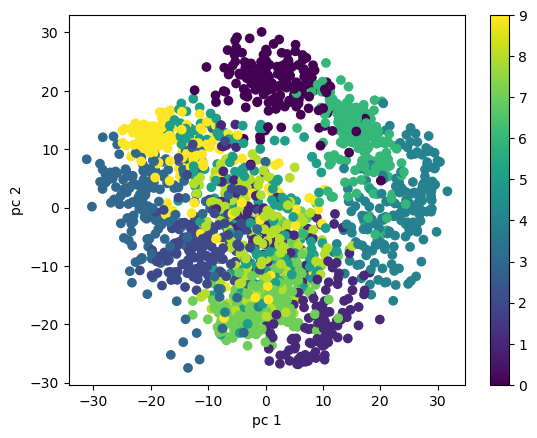

In [21]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0],new_digits[:,1],c=digits.target)# c to identify classes
plt.xlabel("pc 1")
plt.ylabel('pc 2')
plt.colorbar()
plt.show

# PCA for speedup models 

In [24]:
from sklearn.datasets import load_digits
import numpy as np


In [25]:
digits = load_digits()

In [26]:
digits.data.shape

(1797, 64)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data =sc.fit_transform(digits.data)


In [37]:
from sklearn.decomposition import PCA
pca =PCA(n_components=10)
new_data_pca =pca.fit_transform(new_data)

In [38]:
new_data_pca.shape

(1797, 10)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(new_data,digits.target,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start= time.time()
model.fit(x_train,y_train)
end = time.time()


print((end - start)*1000)


210.62517166137695


In [36]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(new_data_pca,digits.target,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start= time.time()
model.fit(x_train,y_train)
end = time.time()


print((end - start)*1000)

160.630464553833


In [41]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8972222222222223